In [2]:
#importing packages
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import scipy.stats
from tqdm.notebook import tqdm

from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats


# plot options
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

%config InlineBackend.figure_format='retina'

(5, 1000)


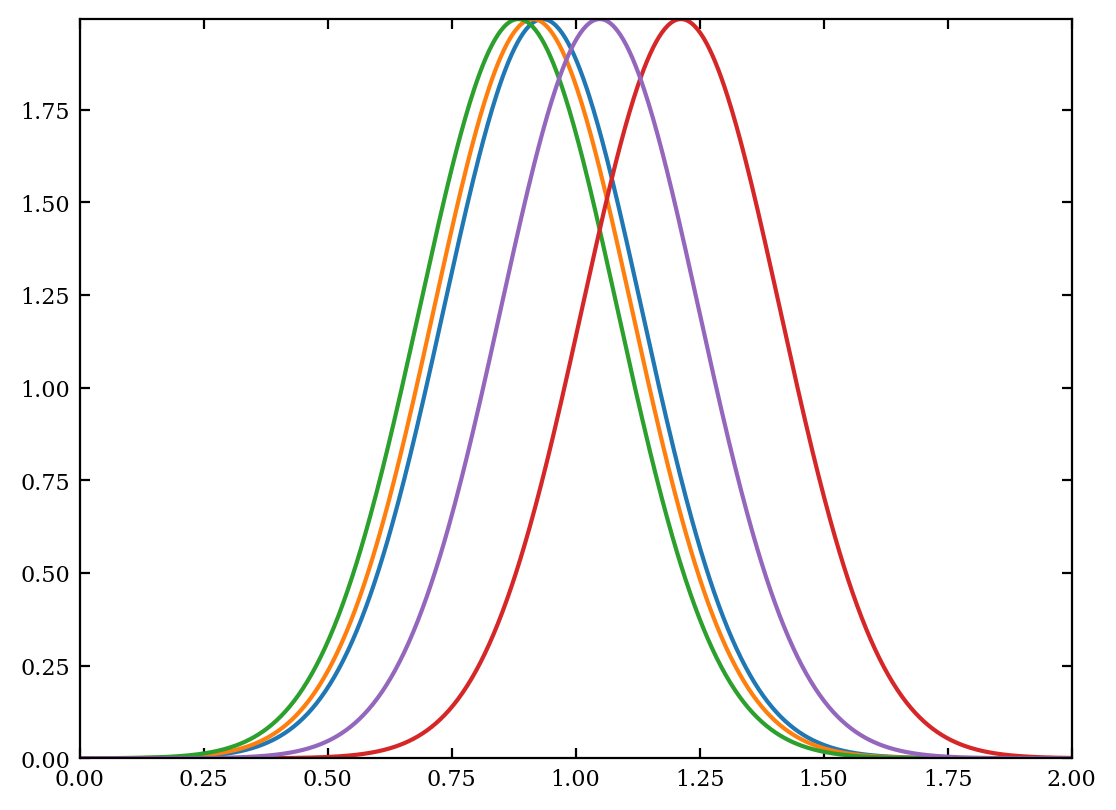

In [10]:
N = 5
mu = 1
sigma = 0.2

quasars = norm.rvs(mu, sigma, N)
#we will treat each of these measurments as the estimate of the true mean
#so we have to center each gaussian on each quasar measurement

x = np.linspace(0,3,1000)
y = []

for i in range(N):
    y.append(norm.pdf(x, quasars[i], sigma))
    plt.plot(x, y[i])

y = np.array(y)
print(y.shape)

plt.xlim(0,2);

Each of these gaussians represents the probability of each measurement $p(x_i | \mu, \sigma)$. Now the likelihood will be the product of these 10 gaussians, and its estimator will just be the maximum of this.

(1000,)


(0.0, 3.0)

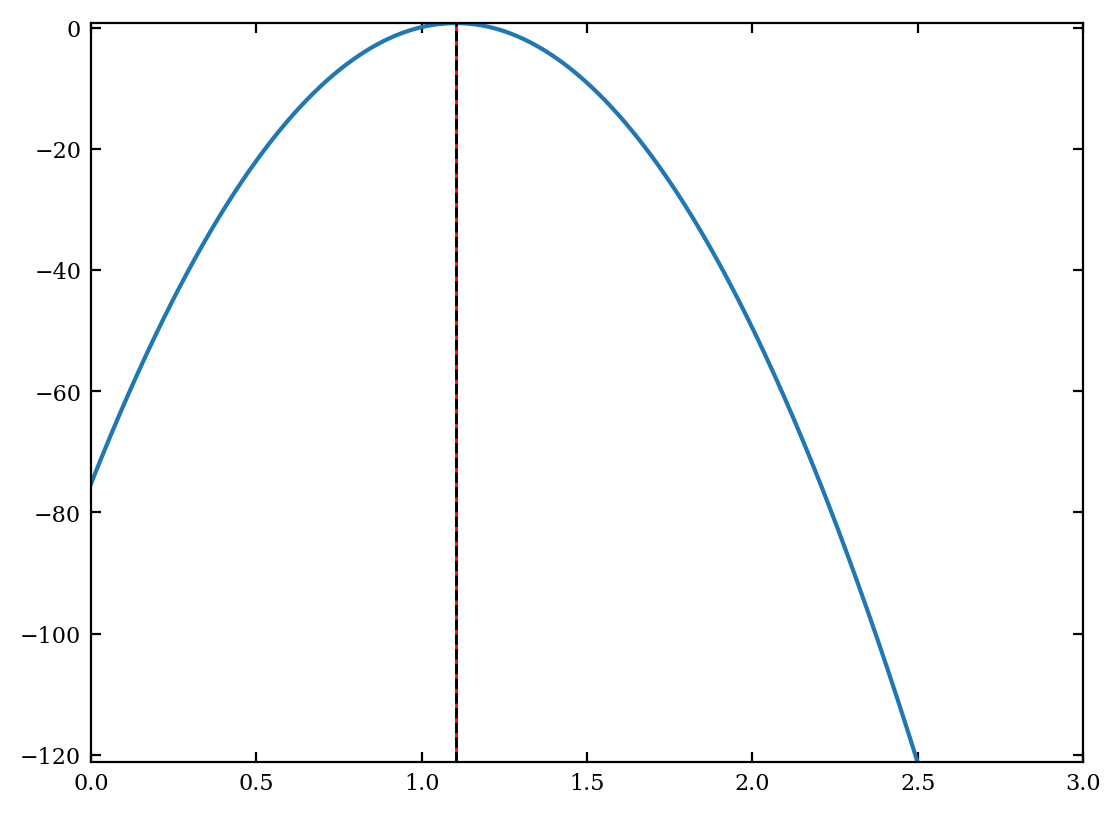

In [8]:
j = np.sum(np.log(y), axis = 0)
print(j.shape)

ind = np.argmax(j)

plt.plot(x, j)
plt.axvline(x = x[ind], color = 'red', lw = 1)
plt.axvline(x = np.mean(quasars), color = 'black', linestyle = "--", lw = 1)
plt.xlim(0, 3)